In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import lzma
import scipy

import matplotlib.ticker as ticker
import matplotlib.patches as patches

load_dir = './data/06_24/'
save_dir = "./plots/"
save_fig = 0 #Change to 1 when you want to save figures
fig_ext = '.png'
#fig_ext = '.pdf'

# Analysis at convergence, fixing ($d$, $\rho$, $\lambda$) and varying $\delta$

---

In [354]:
graph="rrg"
d=3
rho="1"
#delta="0.0100"
#lam="0.90"
N=10000

r = r"$\rho$"
l = r"$\lambda$"
dd = r"$\delta$"

In [355]:
data_table = []

#file_name = "data_BPEpi_rrg_N10000_d3_deltaMax0.0100_lam0.25_rhoMax0.100_seed2_20220622-192416.xz" #06_22
file_name = "data_BPEpi_rrg_N10000_d3_deltaMax0.0100_lam1.00_rhoMax0.050_seed1_20220624-145005.xz" #06_24
with lzma.open(load_dir + file_name, "rb") as f:
    dat0 = pickle.load(f)
data_frame = dat0[0]
data_frame = data_frame.iloc[0:0]

for filename in os.listdir(load_dir):
    path = os.path.join(load_dir, filename)
    if not os.path.isdir(path):
        if not filename.startswith('.'):
            with lzma.open(load_dir + filename, "rb") as f:
                dat = pickle.load(f)
                data_frame = pd.concat([data_frame, dat[0]], ignore_index=True)  

o = r"$\rho$"
s = r"$\delta$"
ov0 = r"$O_{t=0}$"
mov0 = r"$MO_{t=0}$"
ov0_rnd = r"$O_{t=0,RND}$"
mov0_rnd = r"$MO_{t=0,RND}$"
dov0 = r"$\delta O_{t=0}$"
ov0t = r"$\widetilde{O}_{t=0}$"
mov0t = r"$\widetilde{MO}_{t=0}$"
dov0t = r"$\widetilde{\delta O}_{t=0}$"
ovT = r"$O_{t=T}$"
movT = r"$MO_{t=T}$"
ovT_rnd = r"$O_{t=T,RND}$"
movT_rnd = r"$MO_{t=T,RND}$"
dovT = r"$\delta O_{t=T}$"
ovTt = r"$\widetilde{O}_{t=T}$"
movTt = r"$\widetilde{MO}_{t=T}$"
dovTt = r"$\widetilde{\delta O}_{t=T}$"
se_rnd = r"$SE_{RND}$"
mse_rnd = r"$MSE_{RND}$"
dse = r"$\delta SE$"
Rse =  r"$\widetilde{SE}$"
Rmse =  r"$\widetilde{MSE}$"
dRse =  r"$\widetilde{\delta SE}$"
se = "SE"
mse = "MSE"
fI = "$f_I$"
Delta = "$\Delta$"

In [356]:
data_frame[data_frame[Delta]==1]

,$N$,$d$,$\lambda$,$\Delta$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,...,$MSE_{RND}$,$\delta SE$,$\widetilde{SE}$,$\widetilde{MSE}$,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$
20,10000,3,0.7,1,10,2000,0.01,0.05,rnd,0.9922,...,34.137326,-0.241051,0.176720,0.178246,-0.001526,-1285.700122,339.0,25,0,0.9295
21,10000,3,0.7,1,10,2000,0.01,0.05,inf,0.9922,...,34.137326,-0.241051,0.176720,0.178246,-0.001526,-1285.700122,335.0,25,0,0.9295
22,10000,3,0.7,1,10,2000,0.01,0.05,rnd,0.9925,...,29.997327,-0.777158,0.197083,0.187231,0.009852,-1267.957772,330.0,23,1,0.9271
23,10000,3,0.7,1,10,2000,0.01,0.05,inf,0.9925,...,29.997327,-0.777158,0.197083,0.187231,0.009852,-1267.957772,330.0,23,1,0.9271
24,10000,3,0.7,1,10,2000,0.01,0.05,rnd,0.9943,...,31.176025,1.162887,0.167291,0.190193,-0.022902,-1271.509010,452.0,24,2,0.9260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,10000,3,0.9,1,10,2000,0.01,0.01,inf,0.9902,...,3.992441,0.304993,0.046904,0.082125,-0.035221,-168.790838,179.0,14,7,0.9986
2346,10000,3,0.9,1,10,2000,0.01,0.01,rnd,0.9908,...,4.050700,0.053853,0.078933,0.086725,-0.007792,-191.293493,225.0,14,8,0.9987
2347,10000,3,0.9,1,10,2000,0.01,0.01,inf,0.9908,...,4.050700,0.053853,0.078933,0.086725,-0.007792,-191.293493,239.0,14,8,0.9987
2348,10000,3,0.9,1,10,2000,0.01,0.01,rnd,0.9909,...,4.073048,0.089837,0.106578,0.102013,0.004564,-192.539642,185.0,14,9,0.9987


In [357]:
rdd=r"$\rho / \delta$"
ddr=r"$\delta / \rho$"
data_frame[rdd] = data_frame[r]/data_frame[dd]
data_frame[ddr] = data_frame[dd]/data_frame[r]

In [358]:
RmseR = r"$\overline{MSE}$"
data_frame[RmseR] = (data_frame[Rmse] - data_frame[r])/(1- data_frame[r])

In [359]:
Rmov0t = r"$\overline{MO}_{t=0}$"
data_frame[Rmov0t] = (data_frame[mov0t] - data_frame[r])/(1- data_frame[r])

In [360]:
data_frame[data_frame[dd]!=0.01]

,$N$,$d$,$\lambda$,$\Delta$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,...,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$,$\rho / \delta$,$\delta / \rho$,$\overline{MSE}$,$\overline{MO}_{t=0}$


In [361]:
data_frame[data_frame["# iter"]==2000].iloc[:,0:]

,$N$,$d$,$\lambda$,$\Delta$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,...,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$,$\rho / \delta$,$\delta / \rho$,$\overline{MSE}$,$\overline{MO}_{t=0}$
1282,10000,3,0.9,6,10,2000,0.01,0.05,rnd,0.9944,...,-0.037829,-773.542252,2000.0,16,1,1.0,5.0,0.2,0.696630,0.529270
1283,10000,3,0.9,6,10,2000,0.01,0.05,inf,0.9944,...,-0.042820,-776.649258,2000.0,16,1,1.0,5.0,0.2,0.697272,0.531345
1462,10000,3,0.9,6,10,2000,0.01,0.05,rnd,0.9944,...,-0.037829,-773.542252,2000.0,16,1,1.0,5.0,0.2,0.696630,0.529270
1463,10000,3,0.9,6,10,2000,0.01,0.05,inf,0.9944,...,-0.042820,-776.649258,2000.0,16,1,1.0,5.0,0.2,0.697272,0.531345
1606,10000,3,0.8,4,10,2000,0.01,0.05,rnd,0.9931,...,-0.049553,-899.283976,2000.0,15,3,1.0,5.0,0.2,0.591474,0.351603
1607,10000,3,0.8,4,10,2000,0.01,0.05,inf,0.9931,...,-0.049553,-899.283976,2000.0,15,3,1.0,5.0,0.2,0.591474,0.351603


In [362]:
df = data_frame[data_frame["# iter"]!=2000]
df.iloc[:,:17]

,$N$,$d$,$\lambda$,$\Delta$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,$MO_{t=0}$,$\delta O_{t=0}$,"$O_{t=0,RND}$","$MO_{t=0,RND}$",$\widetilde{O}_{t=0}$,$\widetilde{MO}_{t=0}$,$\widetilde{\delta O}_{t=0}$
0,10000,3,0.8,6,10,2000,0.01,0.01,rnd,0.9894,0.990530,-0.001130,0.9895,0.990507,-0.009524,0.002358,-0.011882
1,10000,3,0.8,6,10,2000,0.01,0.01,inf,0.9894,0.990530,-0.001130,0.9895,0.990507,-0.009524,0.002358,-0.011882
2,10000,3,0.8,6,10,2000,0.01,0.01,rnd,0.9897,0.989099,0.000601,0.9895,0.988999,0.019048,0.009087,0.009961
3,10000,3,0.8,6,10,2000,0.01,0.01,inf,0.9897,0.989099,0.000601,0.9895,0.988999,0.019048,0.009087,0.009961
4,10000,3,0.8,6,10,2000,0.01,0.01,rnd,0.9918,0.991228,0.000572,0.9917,0.991215,0.012048,0.001424,0.010624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10000,3,0.6,6,10,2000,0.01,0.01,inf,0.9907,0.990088,0.000612,0.9905,0.989753,0.021053,0.032670,-0.011618
2496,10000,3,0.6,6,10,2000,0.01,0.01,rnd,0.9913,0.990810,0.000490,0.9912,0.990710,0.011364,0.010764,0.000599
2497,10000,3,0.6,6,10,2000,0.01,0.01,inf,0.9913,0.990810,0.000490,0.9912,0.990710,0.011364,0.010764,0.000599
2498,10000,3,0.6,6,10,2000,0.01,0.01,rnd,0.9903,0.990015,0.000285,0.9903,0.989903,0.000000,0.011110,-0.011110


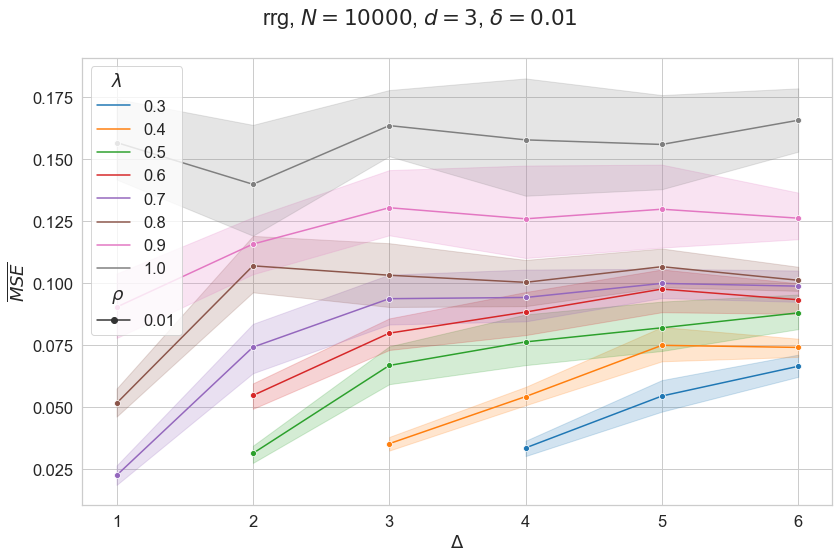

In [373]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(12,8),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\delta=0.01$")
#df = data_frame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")
sns.lineplot(data = df[(df["init"]=="rnd") & (df[r]==0.01)], x = Delta, y= RmseR, markers=True, style=r,ax=ax, hue=l, palette="tab10")


plt.tight_layout()
#fig.savefig(f"RMOV0T_{graph}_N{N}_d{d}_DELTA_lam_rho.pdf")

# Change of final state

In [227]:
load_dir = './data/06_22/'
#data_BPEpi_rrg_N10000_d3_deltaMax0.0100_lam0.25_rhoMax0.100_seed2_20220622-192416

In [228]:
data_table = []

file_name = "data_BPEpi_rrg_N10000_d3_deltaMax0.0100_lam0.25_rhoMax0.100_seed2_20220622-192416.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    dat0 = pickle.load(f)
data_frame = dat0[0]
data_frame = data_frame.iloc[0:0]

for filename in os.listdir(load_dir):
    path = os.path.join(load_dir, filename)
    if not os.path.isdir(path):
        if not filename.startswith('.'):
            with lzma.open(load_dir + filename, "rb") as f:
                dat = pickle.load(f)
                data_frame = pd.concat([data_frame, dat[0]], ignore_index=True)  

o = r"$\rho$"
s = r"$\delta$"
ov0 = r"$O_{t=0}$"
mov0 = r"$MO_{t=0}$"
ov0_rnd = r"$O_{t=0,RND}$"
mov0_rnd = r"$MO_{t=0,RND}$"
dov0 = r"$\delta O_{t=0}$"
ov0t = r"$\widetilde{O}_{t=0}$"
mov0t = r"$\widetilde{MO}_{t=0}$"
dov0t = r"$\widetilde{\delta O}_{t=0}$"
ovT = r"$O_{t=T}$"
movT = r"$MO_{t=T}$"
ovT_rnd = r"$O_{t=T,RND}$"
movT_rnd = r"$MO_{t=T,RND}$"
dovT = r"$\delta O_{t=T}$"
ovTt = r"$\widetilde{O}_{t=T}$"
movTt = r"$\widetilde{MO}_{t=T}$"
dovTt = r"$\widetilde{\delta O}_{t=T}$"
se_rnd = r"$SE_{RND}$"
mse_rnd = r"$MSE_{RND}$"
dse = r"$\delta SE$"
Rse =  r"$\widetilde{SE}$"
Rmse =  r"$\widetilde{MSE}$"
dRse =  r"$\widetilde{\delta SE}$"
se = "SE"
mse = "MSE"
fI = "$f_I$"
Delta = "$\Delta$"

In [267]:
RseR = r"$\overline{SE}$"
data_frame[RseR] = (data_frame[Rse] - data_frame[r])/(1- data_frame[r])

In [229]:
RmseR = r"$\overline{MSE}$"
data_frame[RmseR] = (data_frame[Rmse] - data_frame[r])/(1- data_frame[r])

In [230]:
Rmov0t = r"$\overline{MO}_{t=0}$"
data_frame[Rmov0t] = (data_frame[mov0t] - data_frame[r])/(1- data_frame[r])

In [231]:
RmovTt = r"$\overline{MO}_{t=T}$"
data_frame[RmovTt] = (data_frame[movTt] - data_frame[r])/(1- data_frame[r])

In [246]:
RovTt = r"$\overline{O}_{t=T}$"
data_frame[RovTt] = (data_frame[ovTt] - data_frame[r])/(1- data_frame[r])

In [247]:
data_frame[data_frame["# iter"]==2000].iloc[:,0:]

,$N$,$d$,$\lambda$,$\Delta$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,...,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$,$\overline{MSE}$,$\overline{MO}_{t=0}$,$\overline{MO}_{t=T}$,$\overline{O}_{t=T}$


In [268]:
df = data_frame[data_frame["# iter"]!=2000]
df.iloc[:,17:]

,$O_{t=T}$,$MO_{t=T}$,$\delta O_{t=T}$,"$O_{t=T,RND}$","$MO_{t=T,RND}$",$\widetilde{O}_{t=T}$,$\widetilde{MO}_{t=T}$,$\widetilde{\delta O}_{t=T}$,error,SE,...,logLikelihood,# iter,T,sim,$f_I$,$\overline{MSE}$,$\overline{MO}_{t=0}$,$\overline{MO}_{t=T}$,$\overline{O}_{t=T}$,$\overline{SE}$
0,0.9912,0.990894,0.000306,0.9901,0.989794,0.111111,0.107776,0.003335,8.317219e-10,31.209871,...,-3231.664345,150.0,51,0,0.9901,0.353027,0.036013,0.008640,0.012346,0.347385
1,0.9912,0.990894,0.000306,0.9901,0.989794,0.111111,0.107776,0.003335,8.903728e-10,31.209871,...,-3231.664345,137.0,51,0,0.9901,0.353027,0.036013,0.008640,0.012346,0.347385
2,0.9315,0.922021,0.009479,0.9119,0.902366,0.222474,0.201315,0.021160,8.501759e-10,48.331922,...,-509.325765,176.0,37,0,0.0881,0.168541,-0.006517,0.112572,0.136083,0.220444
3,0.9315,0.922021,0.009479,0.9119,0.902366,0.222474,0.201315,0.021160,9.777769e-10,48.331922,...,-509.325765,173.0,37,0,0.0881,0.168541,-0.006517,0.112572,0.136083,0.220444
4,0.9997,0.999424,0.000276,0.9995,0.999224,0.400001,0.257709,0.142292,8.515986e-10,13.656604,...,-2816.820301,178.0,45,0,0.9995,0.478285,0.070968,0.175233,0.333335,0.504392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.9999,0.999736,0.000164,0.9998,0.999636,0.500002,0.274655,0.225348,8.471532e-10,13.216834,...,-2732.098653,174.0,47,0,0.9998,0.536796,0.068024,0.194061,0.444447,0.562133
194,0.9710,0.977549,-0.006549,0.9671,0.973727,0.118541,0.145459,-0.026918,6.071095e-10,3.070367,...,-162.872986,78.0,11,0,0.0329,0.071713,0.022417,0.050510,0.020601,0.056382
195,0.9710,0.977549,-0.006549,0.9671,0.973727,0.118541,0.145459,-0.026918,7.222831e-10,3.070367,...,-162.872986,80.0,11,0,0.0329,0.071713,0.022417,0.050510,0.020601,0.056382
196,0.9889,0.990649,-0.001749,0.9878,0.989549,0.090164,0.105253,-0.015089,8.465257e-10,35.928424,...,-2838.565008,168.0,53,0,0.9878,0.326459,-0.032284,0.005837,-0.010929,0.298920


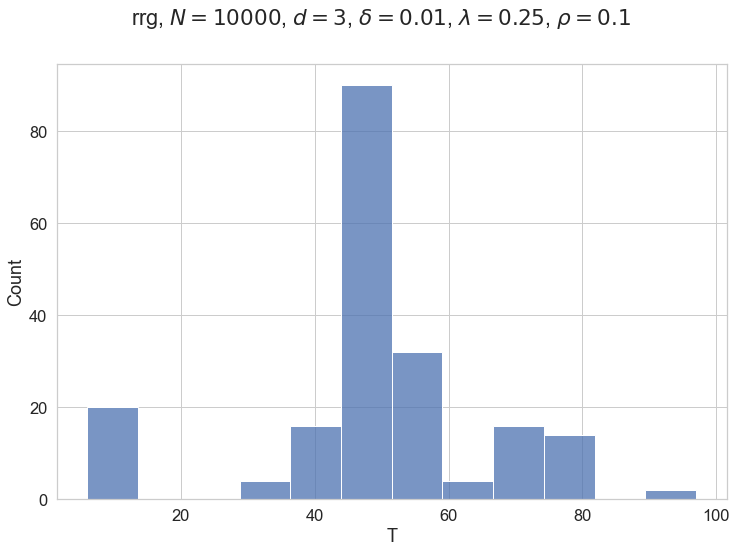

In [234]:
i_Delta=4
#sns.histplot(data=df[df[Delta]==i_Delta],x="T",bins=12)
fig,ax = plt.subplots(1,1, figsize=(12,8),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\delta=0.01$, $\\lambda=0.25$, $\\rho=0.1$")
sns.histplot(data=df,x="T",bins=12)
fig.savefig(f"histT_{graph}_N{N}_d{d}_DELTA_del0.01_lam0.25_rho0.1.pdf")

In [285]:
df[df[Delta]==10].iloc[:,15:29]

,$\widetilde{MO}_{t=0}$,$\widetilde{\delta O}_{t=0}$,$O_{t=T}$,$MO_{t=T}$,$\delta O_{t=T}$,"$O_{t=T,RND}$","$MO_{t=T,RND}$",$\widetilde{O}_{t=T}$,$\widetilde{MO}_{t=T}$,$\widetilde{\delta O}_{t=T}$,error,SE,MSE,$SE_{RND}$
48,0.118033,-0.016910,0.9996,0.999764,-0.000164,0.9996,0.999764,0.000002,0.000004,-1.736263e-06,9.216471e-10,13.568611,13.564406,32.185763
49,0.118033,-0.016910,0.9996,0.999764,-0.000164,0.9996,0.999764,0.000002,0.000004,-1.736263e-06,8.492205e-10,13.568611,13.564406,32.185763
78,0.120762,-0.020762,0.9998,0.999802,-0.000002,0.9998,0.999802,0.000005,0.000005,-4.737903e-08,8.472710e-10,13.695189,13.512372,31.461061
79,0.120762,-0.020762,0.9998,0.999802,-0.000002,0.9998,0.999802,0.000005,0.000005,-4.737903e-08,8.886767e-10,13.695189,13.512372,31.461061
84,0.187525,-0.006573,1.0000,0.999799,0.000201,1.0000,0.999799,1.000000,0.000005,9.999950e-01,8.271736e-10,12.292931,13.275257,30.258498
85,0.187525,-0.006573,1.0000,0.999799,0.000201,1.0000,0.999799,1.000000,0.000005,9.999950e-01,7.894553e-10,12.292931,13.275257,30.258498
120,0.122338,0.036078,0.9997,0.999677,0.000023,0.9997,0.999677,0.000003,0.000003,2.350264e-07,8.799371e-10,12.970834,13.963112,29.580546
121,0.122338,0.036078,0.9997,0.999677,0.000023,0.9997,0.999677,0.000003,0.000003,2.350264e-07,7.727440e-10,12.970834,13.963112,29.580546
140,0.226134,-0.006836,0.9999,0.999783,0.000117,0.9999,0.999783,0.000010,0.000005,5.382625e-06,9.994261e-10,13.553440,12.988510,29.963290
141,0.226134,-0.006836,0.9999,0.999783,0.000117,0.9999,0.999783,0.000010,0.000005,5.382625e-06,9.915813e-10,13.553440,12.988510,29.963290


In [351]:
yy=mov0

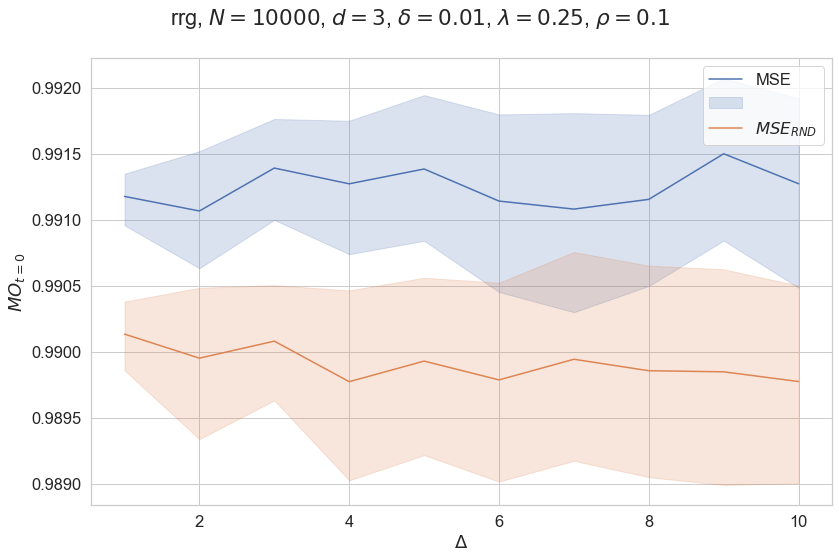

In [352]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(12,8),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\delta=0.01$, $\\lambda=0.25$, $\\rho=0.1$")
#df = data_frame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")

sns.lineplot(data = df[df["init"]=="rnd"], x = Delta, y=yy, markers=True,ax=ax)
sns.lineplot(data = df[df["init"]=="rnd"], x = Delta, y=mov0_rnd, markers=True,ax=ax)

plt.tight_layout()
ax.legend([mse, None, mse_rnd])
#plt.legend()
#fig.savefig(f"MSE_{graph}_N{N}_d{d}_DELTA_del0.01_lam0.25_rho0.1.pdf")

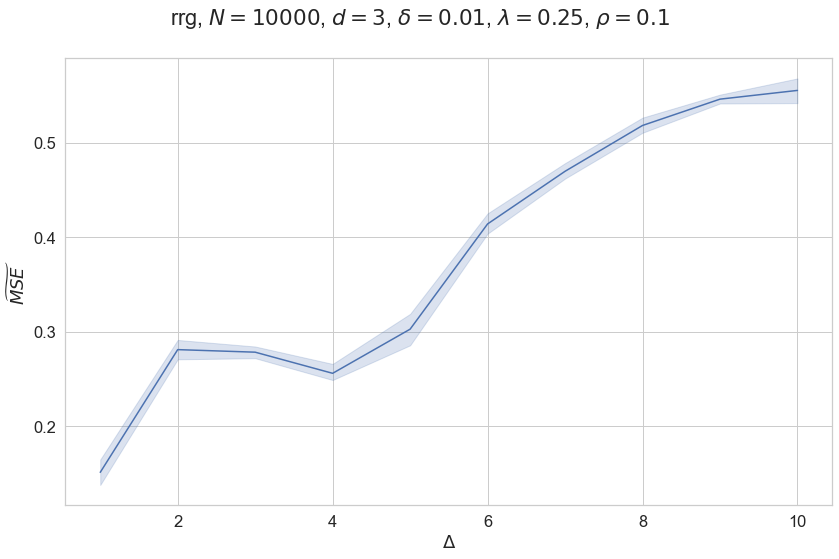

In [349]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(12,8),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\delta=0.01$, $\\lambda=0.25$, $\\rho=0.1$")
#df = data_frame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")

sns.lineplot(data = df[df["init"]=="rnd"], x = Delta, y=Rmse, markers=True,ax=ax)

plt.tight_layout()
#plt.legend()
fig.savefig(f"MSET_{graph}_N{N}_d{d}_DELTA_del0.01_lam0.25_rho0.1.pdf")

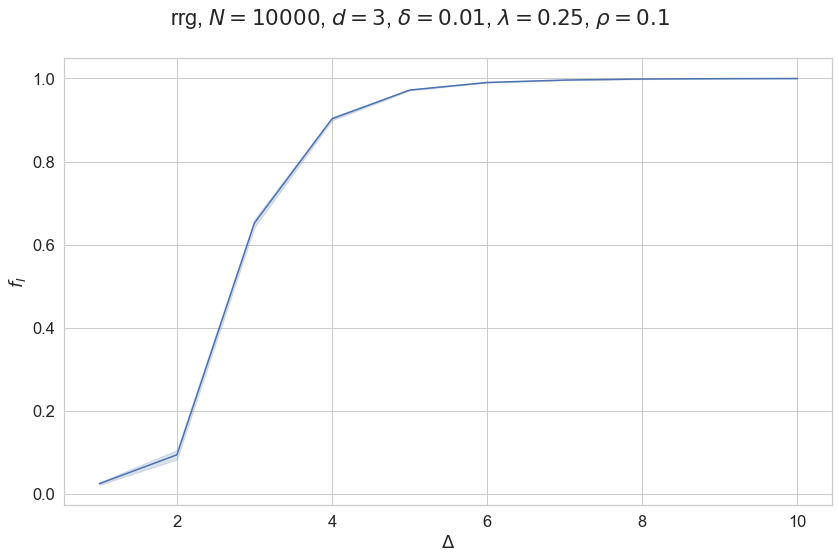

In [350]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(12,8),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\delta=0.01$, $\\lambda=0.25$, $\\rho=0.1$")
#df = data_frame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")
sns.lineplot(data = df[df["init"]=="rnd"], x = Delta, y=fI, markers=True,ax=ax, palette="tab10")


plt.tight_layout()
fig.savefig(f"fI_{graph}_N{N}_d{d}_DELTA_del0.01_lam0.25_rho0.1.pdf")